In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures
import time


In [2]:
# Storing the start time as a float value of time in seconds
start = time.perf_counter()

# Define a function that consumes a stock name and returns a temporary
# Dataframe with the Open Price, High, Low, Close Price, and Volume of the stock.
# It also returns the stock name and the sector name for the stock. The function
# returns an empty DataFrame if the stock meets the none of the requirements 
def get_info(stock):
    
    # Create an empty DataFrame
    temp_frame=pd.DataFrame()
    
    # Obtain the ticker for the stock
    tick = yf.Ticker(stock)
    
    # Extract the history of the stock
    tick_hist = tick.history(start=start_date,end=end_date)
    
    # If the number of index for the stock history is not 0
    if len(tick_hist.index) != 0:
        
        # Assign the stock info to tick_info variable
        tick_info = tick.info
        
        # If the stock is an U.S stock
        if tick_info['currency'] == 'USD':
            
            # If the average volume of the stock is greater equal to 10000
            if tick_hist['Volume'].mean()>= 10000:
                
                # For loop that iterates and obtains the stock's
                # Open Price, High, Low, Close Price and Volume
                for need in hist_need:
                    
                    # Create a column in the DataFrame for each of the needs
                    temp_frame[need+' of '+stock]=tick_hist[need]
                    
                # Return the DataFrame, the stock name, and the sector name
                return (temp_frame,stock, tick_info['sector'])
            
    # Returns an empty DataFrame if the stock met no requirements
    return pd.DataFrame(),'',''

# Set the start date
start_date = '2021-07-02'

# Set the end date
end_date = '2021-10-22'

# Create an empty DataFrame for the stock history data
hist_data = pd.DataFrame()

# Create an empty dynamic array to store filtered stock names
clean_stocks = []

# Create an empty dynamic array to store sector names
industry_list = []

# Create an array that stores the required fields of a stock
hist_need = ['Open','High','Low','Close','Volume']

# Extract tickers from the CSV file
tick_data = pd.read_csv("Tickers.csv",names=["Tickers"])

# Create an empty dynamic array to store ticker names
list_tick = []

# For loop that iterates to extract all tickers from CSV file
for x in range(len(tick_data.index)):
    
    # Append each new ticker in the CSV to the ticker list
    list_tick.append(tick_data['Tickers'].iloc[x])
    
# Display the list of tickers 
print(list_tick)

# Not sure what this does
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = executor.map(get_info, list_tick)
    for result in results:
        hist_data = pd.concat([hist_data,result[0]],join='outer',axis=1)
        clean_stocks.append(result[1])
        industry_list.append(result[2])
        
# While loop that iterates to remove empty spaces in the industry_list
# and the clean_stocks list
while True:
    
    # If there is no more empty spaces in clean_stocks, terminate iteration
    if "" not in clean_stocks:
        break
        
    # Else, remove empty spaces from the two lists
    else:
        industry_list.remove("")
        clean_stocks.remove("")
        
# Storing the finish time as a float value of time in seconds
finish = time.perf_counter()

# Display the execution time
print(f'Finished in {round(finish-start,2)} seconds(s)')

# Drop all NA entries
hist_data.dropna(inplace=True)

# Display the list of filtered stocks
print(clean_stocks)

# Display the data for stock history
hist_data.head()

['AAPL', 'ABBV', 'ABT', 'ACN', 'AGN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CELG', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'GM', 'GOOG', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PCLN', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTN', 'SHOP.TO', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TD.TO', 'TGT', 'TWX', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']
- AGN: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- PCLN: None
- RTN: No data found, symbol may be delisted
- TWX: No data found for this date range, symbol may be delisted
Finished in 30.55 seconds(s)
['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'GM', 'GOOG', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'SB

,Open of AAPL,High of AAPL,Low of AAPL,Close of AAPL,Volume of AAPL,Open of ABBV,High of ABBV,Low of ABBV,Close of ABBV,Volume of ABBV,...,Open of UPS,High of UPS,Low of UPS,Close of UPS,Volume of UPS,Open of USB,High of USB,Low of USB,Close of USB,Volume of USB
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-02,137.493033,139.586842,137.343482,139.546967,78852600.0,111.900738,112.848554,111.285150,112.535873,5719500.0,...,207.463349,209.947891,207.156497,209.383667,2172300.0,57.171395,57.300406,56.744668,57.131699,3520900.0
2021-07-06,139.656634,142.727531,139.656634,141.600876,108181800.0,112.535879,113.249187,112.145027,113.083076,7172100.0,...,208.324538,209.462863,206.077567,209.146103,2421300.0,56.665274,56.893526,55.206468,55.583572,5008700.0
2021-07-07,143.116382,144.462404,142.238989,144.143356,104911600.0,113.258966,114.294720,112.672683,114.079750,6695100.0,...,209.165904,212.749168,208.185959,212.085968,2553700.0,55.246161,56.049996,55.037761,55.563728,5125700.0
2021-07-08,141.162171,143.634848,140.254853,142.817276,105575500.0,113.112394,114.138374,113.034222,113.688896,3948800.0,...,208.185954,210.541795,207.770203,209.918198,2354300.0,54.700349,55.216391,54.253774,54.620960,5977700.0
2021-07-09,142.328727,145.220162,142.229016,144.681763,99890800.0,113.640040,114.646482,113.454384,113.913635,4823400.0,...,211.719726,212.323537,210.512104,211.749420,2050500.0,55.653043,56.605733,55.424791,56.536266,4437300.0


In [3]:
# Defines a function that consumes a list of stock names and produces a DataFrame that contains the daily returns
# of the stocks
def get_daily_returns(list_of_stock):
    
    # Create an empty DataFrame for daily returns
    daily_returns = pd.DataFrame()
    
    # For loop that iterates to obtain the daily returns of stocks
    for stock in list_of_stock:
        daily_returns['Daily Returns of '+stock] = hist_data['Close of '+stock].pct_change()*100
        
    # Drop all N/A outputs
    daily_returns.dropna(inplace=True)
    
    # Return the DataFrame
    return daily_returns

In [4]:
# Function call to obtain daily returns of the filtered stocks
daily_returns = get_daily_returns(clean_stocks)

# Display the DataFrame
daily_returns.head()

,Daily Returns of AAPL,Daily Returns of ABBV,Daily Returns of ABT,Daily Returns of ACN,Daily Returns of AIG,Daily Returns of AMZN,Daily Returns of AXP,Daily Returns of BA,Daily Returns of BAC,Daily Returns of BIIB,...,Daily Returns of SLB,Daily Returns of SO,Daily Returns of SPG,Daily Returns of T,Daily Returns of TGT,Daily Returns of TXN,Daily Returns of UNH,Daily Returns of UNP,Daily Returns of UPS,Daily Returns of USB
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-06,1.471841,0.486248,0.660788,0.183700,-2.996878,4.692707,0.629081,-0.228153,-2.624553,-1.098299,...,-4.940534,0.178772,-1.535144,-0.718434,-0.458275,-0.525473,0.219863,-0.404951,-0.113459,-2.709750
2021-07-07,1.795526,0.881364,0.883694,1.378522,0.386187,0.566963,0.837459,-1.846363,-0.798599,3.027044,...,-1.572021,0.081111,-1.449386,-0.310138,0.855578,-0.742678,0.341241,2.028508,1.405651,-0.035701
2021-07-08,-0.919973,-0.342615,-0.508882,-0.148580,-4.124817,0.942218,-2.035319,2.152906,-2.440249,3.861200,...,-0.488914,-0.226939,-0.556491,-0.809570,0.416077,-0.811460,-0.415389,-4.383626,-1.022119,-1.696733
2021-07-09,1.305505,0.197679,0.402476,1.122430,4.480600,-0.323466,2.650744,1.191026,3.249103,-2.950815,...,2.161804,-0.129972,3.677358,0.958127,0.000000,1.078409,0.526891,1.534306,0.872351,3.506540
2021-07-12,-0.420381,0.900663,-0.776685,-0.335861,1.216133,-0.021241,0.965453,-0.542595,1.473522,-2.546347,...,0.096184,0.536845,0.447218,0.105441,1.472360,0.867191,0.953630,-0.212007,-0.275798,1.070743


In [5]:
# Create a DataFrame to store the beta values
beta_data = pd.DataFrame()
MarketIndex='^GSPC'

# Extract Ticker information
marketing_tick = yf.Ticker(MarketIndex)

# Extract ticker history data
marketing_hist = marketing_tick.history(start=start_date,end=end_date)

# Obtain the rate of return for the closing prices of the ticker
beta_data[MarketIndex] = marketing_hist['Close'].pct_change()*100

# Concatenate the beta values DataFrame and Daily Returns DataFrame
beta_data = pd.concat([beta_data, daily_returns],join='inner',axis=1)

# Calculate the variance for the ticker
MarketVar= beta_data['^GSPC'].var()

# Calculate Beta values 
Beta = pd.DataFrame(beta_data.cov() / MarketVar)

beta_vals = pd.DataFrame(Beta.iloc[[0]])

# Rename index name and display the DataFrame
beta_vals.index = ['Beta']
beta_vals.head()

,^GSPC,Daily Returns of AAPL,Daily Returns of ABBV,Daily Returns of ABT,Daily Returns of ACN,Daily Returns of AIG,Daily Returns of AMZN,Daily Returns of AXP,Daily Returns of BA,Daily Returns of BAC,...,Daily Returns of SLB,Daily Returns of SO,Daily Returns of SPG,Daily Returns of T,Daily Returns of TGT,Daily Returns of TXN,Daily Returns of UNH,Daily Returns of UNP,Daily Returns of UPS,Daily Returns of USB
Beta,1.0,1.29928,0.668293,0.458501,1.044192,1.484594,1.010834,1.425493,1.443641,1.422094,...,1.673033,0.295347,1.557336,0.659789,0.985832,1.031316,0.91933,1.065526,0.703829,1.257542


In [7]:
# What is this for?
(daily_returns['Daily Returns of AAPL'] - ((daily_returns['Daily Returns of AAPL'].mean()) * beta_vals['Daily Returns of AAPL'].iloc[0])).mean()

-0.030029674100170527

In [8]:
# Create an empty DataFrame for alpha
alpha = pd.DataFrame()

# For loop that iterates to obtain the daily alpha values
for stock in clean_stocks:
    alpha['Alpha '+stock] = daily_returns['Daily Returns of '+stock] - ((daily_returns['Daily Returns of '+stock].mean()) * beta_vals['Daily Returns of '+stock].iloc[0])

# Display alpha DataFrame
alpha.head()

,Alpha AAPL,Alpha ABBV,Alpha ABT,Alpha ACN,Alpha AIG,Alpha AMZN,Alpha AXP,Alpha BA,Alpha BAC,Alpha BIIB,...,Alpha SLB,Alpha SO,Alpha SPG,Alpha T,Alpha TGT,Alpha TXN,Alpha UNH,Alpha UNP,Alpha UPS,Alpha USB
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-06,1.341471,0.512159,0.617273,-0.016185,-3.461665,4.710646,0.504466,-0.058876,-2.906870,-0.965395,...,-5.107431,0.156755,-1.809882,-0.658013,-0.511369,-0.607884,0.110262,-0.462445,-0.068655,-2.872806
2021-07-07,1.665157,0.907275,0.840179,1.178637,-0.078600,0.584902,0.712843,-1.677085,-1.080916,3.159947,...,-1.738918,0.059095,-1.724124,-0.249718,0.802484,-0.825089,0.231641,1.971014,1.450455,-0.198758
2021-07-08,-1.050343,-0.316703,-0.552398,-0.348466,-4.589605,0.960157,-2.159935,2.322183,-2.722566,3.994103,...,-0.655811,-0.248956,-0.831229,-0.749149,0.362983,-0.893871,-0.524990,-4.441120,-0.977315,-1.859789
2021-07-09,1.175136,0.223590,0.358961,0.922544,4.015813,-0.305527,2.526128,1.360303,2.966786,-2.817912,...,1.994907,-0.151988,3.402620,1.018548,-0.053094,0.995998,0.417291,1.476812,0.917154,3.343484
2021-07-12,-0.550751,0.926574,-0.820201,-0.535747,0.751345,-0.003302,0.840838,-0.373318,1.191205,-2.413443,...,-0.070713,0.514829,0.172479,0.165862,1.419266,0.784781,0.844030,-0.269501,-0.230994,0.907687


In [11]:
# Storing the start time as a float value of time in seconds
start = time.perf_counter()

# Create empty dynamic arrays for the industry lists
tech_list = []
health_list = []
industrial_list = []
finance_list = []
defensive_list = []
cyclical_list = []
real_estate_list = []
energy_list = []
materials_list = []
communication_list = []
utilities_list = []

# For loop that iterates to append stocks' daily returns to the corresponding industry
for (industry,stock) in zip(industry_list,clean_stocks):
    if industry == "Technology":
        tech_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Healthcare":
        health_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Industrials":
        industrial_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Financial Services":
        finance_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Consumer Defensive":
        defensive_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Consumer Cyclical":
        cyclical_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Real Estate":
        real_estate_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Energy":
        energy_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Basic Materials":
        materials_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Communication Services":
        communication_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
    if industry == "Utilities":
        utilities_list.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),stock))
list_of_industries = [tech_list,health_list,industrial_list,finance_list,defensive_list,cyclical_list,real_estate_list,energy_list,materials_list,communication_list,utilities_list]

# Storing the finish time as a float value of time in seconds
finish = time.perf_counter()

# Display time used to execute code
print(f'Finished in {round(finish-start,2)} seconds(s)')

Finished in 0.0 seconds(s)


In [12]:
# Sort all industry lists
tech_list.sort()
health_list.sort()
industrial_list.sort()
finance_list.sort()
defensive_list.sort()
cyclical_list.sort()
real_estate_list.sort()
energy_list.sort()
materials_list.sort()
communication_list.sort()
utilities_list.sort()

# Display the filtered stock names
print(clean_stocks)

['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BLK', 'BMY', 'C', 'CAT', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'GM', 'GOOG', 'JPM', 'KMI', 'KO', 'LLY', 'LMT', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NEE', 'NKE', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TXN', 'UNH', 'UNP', 'UPS', 'USB']


In [13]:
# Create an empty dynamic array for the final selected list of stocks
total_list = []

# Create a counter for the number of industries
industry_count = 0

# If statements to append stocks into the total_list and keeps track of the number of industries
if len(tech_list)!=0:
    total_list.append(tech_list[0][1])
    industry_count+=1
    
if len(health_list)!=0:
    total_list.append(health_list[0][1])
    industry_count+=1
    
if len(industrial_list)!=0:
    total_list.append(industrial_list[0][1])
    industry_count+=1
    
if len(finance_list)!=0:
    total_list.append(finance_list[0][1])
    industry_count+=1
    
if len(defensive_list)!=0:
    total_list.append(defensive_list[0][1])
    industry_count+=1
    
if len(cyclical_list)!=0:
    total_list.append(cyclical_list[0][1])
    industry_count+=1
    
if len(real_estate_list)!=0:
    total_list.append(real_estate_list[0][1])
    industry_count+=1
    
if len(energy_list)!=0:
    total_list.append(energy_list[0][1])
    industry_count+=1
    
if len(materials_list)!=0:
    total_list.append(materials_list[0][1])
    industry_count+=1
    
if len(communication_list)!=0:
    total_list.append(communication_list[0][1])
    industry_count+=1
    
if len(utilities_list)!=0:
    total_list.append(utilities_list[0][1])
    industry_count+=1
    
# Display the list
total_list 

['CSCO', 'BMY', 'LMT', 'MON', 'PG', 'SBUX', 'SPG', 'KMI', 'T', 'SO']

In [15]:
# Function that consumes a list of stock names and returns the average beta value
def get_beta_total(stocks_list):
    tot = 0
    
    # For loop that iterates to obtain the sum of all beta values
    for x in range (len(stocks_list)):
        tot += beta_vals['Daily Returns of '+ stocks_list[x]]
        
    # Return the average of the beta values
    return (tot/len(stocks_list)).iloc[0]

print (get_beta_total(total_list))

0.6747112872032318


In [17]:
# Function that consumes a list of stock names and returns the average standard deviation
def get_average_std(stocks_list):
    tot = 0
    
    # For loop that iterates to obtain the sum of all standard deviation
    for x in range (len(stocks_list)):
        tot+= daily_returns['Daily Returns of '+ stocks_list[x]].std(axis=0,skipna=True)
        
    # Return the average of the standard deviation
    return (tot/len(stocks_list))

print (get_average_std(total_list))

1.0656913808052098


In [18]:
beta_vals['Daily Returns of AAPL'].iloc[0]

1.2992799041755803

In [19]:
beta_vals.iloc[0,2]

0.6682934263801064

In [20]:
# Function that consumes a list of stock names and produces the average alpha value
def get_alpha_average(stocks_lst):
    
    # Get the current beta column
    column_counter = 1
    
    tot=0
    
    # For loop that iterates to obtain the total average of alpha values
    for stock in stocks_lst:
        tot += alpha['Alpha '+stock].mean()
        column_counter += 1

    # Return the average alpha value
    return tot/len(stocks_lst)

# Function call that obtains the alpha average
alpha_average = get_alpha_average(total_list)

# Display the alpha average
alpha_average

-0.009217213304063868

In [21]:
# MDD Equation: (Peak Value - Trough Value) / Peak Value
def get_mdd_average(stocks):

    tot = 0
    for x in range (len(stocks)):

        trough = min(hist_data['Low of '+stocks[x]])
        peak = max(hist_data['High of '+stocks[x]])
        tot += (peak - trough) / peak

    return tot/len(stocks)
mdd = get_mdd_average(total_list)
mdd

0.12904348680784136

In [22]:
for x in range (len(total_list)):
    clean_stocks.remove(total_list[x])

In [23]:
total_list

['CSCO', 'BMY', 'LMT', 'MON', 'PG', 'SBUX', 'SPG', 'KMI', 'T', 'SO']

In [24]:
print(get_average_std(total_list))
print(get_beta_total(total_list))

1.0656913808052098
0.6747112872032318


In [26]:
list_of_beta = []
for stock in clean_stocks:
    list_of_beta.append((daily_returns['Daily Returns of '+stock].std(axis=0,skipna=True),beta_vals["Daily Returns of "+stock].iloc[0],stock))
list_of_beta.sort()

In [27]:
list_of_beta

[(0.7688321597213277, 0.526987038764354, 'KO'),
 (0.811354836182049, 0.34706343027461595, 'PEP'),
 (0.947398341943153, 0.33995350967060695, 'CL'),
 (0.9523078085840202, 0.633750639821062, 'COST'),
 (1.0415130024902401, 0.4585008373597188, 'ABT'),
 (1.046658278251328, 1.0441915282291343, 'ACN'),
 (1.1008407434985832, 1.110839403878743, 'MSFT'),
 (1.1528168917845187, 0.40040393314666284, 'NEE'),
 (1.1976737036390077, 1.2824741684772516, 'GOOG'),
 (1.1998659276253096, 0.7547429761038534, 'CVS'),
 (1.2195931497649366, 0.7962338413367872, 'MO'),
 (1.2264115916815697, 0.9858317944917501, 'TGT'),
 (1.2565351315580555, 0.6678546757493694, 'PM'),
 (1.2572305588313395, 0.6682934263801064, 'ABBV'),
 (1.263780051997507, 1.0655260248317286, 'UNP'),
 (1.2797325890784927, 1.2992799041755803, 'AAPL'),
 (1.3080834411931583, 0.9193301920783156, 'UNH'),
 (1.3491541086543088, 1.031316188661969, 'TXN'),
 (1.3514651550070829, 0.8365165532705621, 'NKE'),
 (1.3799141849863301, 0.7130210606742565, 'ORCL'),
 (1

In [28]:
threshold = 0
while threshold < len(clean_stocks):
    if len(total_list) == 20:
        break
    beta_temp = get_beta_total(total_list)
    std_temp = get_average_std(total_list)
    beta_stock = list_of_beta[threshold][1]
    std_stock = list_of_beta[threshold][0]
    stock = list_of_beta[threshold][2]
#    print(std_temp,std_stock)
    if std_stock < std_temp:
        if (beta_stock <= beta_temp and beta_temp >= 0) or (beta_stock >= beta_temp and beta_temp < 0):
            total_list.append(stock)
            clean_stocks.remove(stock)
            list_of_beta.pop(threshold)
            threshold-=1
    threshold+=1
counting = 0
print(len(total_list))
while len(total_list) != 20 or len(clean_stocks) ==0 :
    total_list.append(list_of_beta[0][2])
    list_of_beta.pop(0)
print(total_list)
        

13
['CSCO', 'BMY', 'LMT', 'MON', 'PG', 'SBUX', 'SPG', 'KMI', 'T', 'SO', 'KO', 'PEP', 'CL', 'COST', 'ABT', 'ACN', 'MSFT', 'NEE', 'GOOG', 'CVS']


In [29]:
final_returns = get_daily_returns(total_list)
final_returns.head()

,Daily Returns of CSCO,Daily Returns of BMY,Daily Returns of LMT,Daily Returns of MON,Daily Returns of PG,Daily Returns of SBUX,Daily Returns of SPG,Daily Returns of KMI,Daily Returns of T,Daily Returns of SO,Daily Returns of KO,Daily Returns of PEP,Daily Returns of CL,Daily Returns of COST,Daily Returns of ABT,Daily Returns of ACN,Daily Returns of MSFT,Daily Returns of NEE,Daily Returns of GOOG,Daily Returns of CVS
Date,,,,,,,,,,,,,,,,,,,,
2021-07-06,-1.045950,-0.448087,-0.739197,0.776798,0.058867,0.661044,-1.535144,-0.700046,-0.718434,0.178772,-0.553709,0.147741,0.330478,-0.020051,0.660788,0.183700,0.003605,1.144311,0.817286,-1.516439
2021-07-07,0.528499,0.735182,1.270234,0.000000,0.750113,1.218350,-1.449386,-0.759228,-0.310138,0.081111,0.816627,0.442559,0.841784,1.459155,0.883694,1.378522,0.817543,0.266216,0.236190,0.197094
2021-07-08,0.000000,-0.670234,-0.928338,0.195273,-0.014604,-0.981733,-0.556491,-0.710386,-0.809570,-0.226939,-0.349777,0.046737,-0.387135,0.610359,-0.508882,-0.148580,-0.896645,-0.265509,-0.692280,-1.376927
2021-07-09,0.901246,0.704755,0.839640,-0.882137,0.036510,1.275975,3.677358,2.751789,0.958127,-0.129972,0.609640,-0.253573,0.109297,1.282082,0.402476,1.122430,0.187437,-0.186334,0.307715,1.371226
2021-07-12,-0.949018,0.506239,-1.054519,0.382901,0.080277,0.842767,0.447218,-0.803422,0.105441,0.536845,0.036727,0.020069,0.606580,-1.088822,-0.776685,-0.335861,-0.223068,0.133341,0.763655,0.614853


In [31]:
sector_list = [tech_list, health_list, industrial_list, finance_list, defensive_list, cyclical_list,
                real_estate_list, energy_list, materials_list, communication_list, utilities_list]

sector_names = ['Tech', 'Health', 'Industrials', 'Finance', 'Defensive', 'Cyclical', 'Real Estate', 'Energy',
               'Materials', 'Communication', 'Utilities']

def get_change_in_std(final_returns_list, stocks_list):

    adding_industry = []
       
    for sector in sector_list:
        current_industry_std = []
        for stock in stocks_list:
            if(not (not sector)):
                if (stock == sector[0][1]):
                    current_industry_std.append(final_returns_list['Daily Returns of ' + stock].mean())
        if (len(current_industry_std) != 0):     
            adding_industry.append(sum(current_industry_std) / len(current_industry_std))
        
        else:
            adding_industry.append(0)

            
    return adding_industry
                
std_adding_industries = pd.DataFrame(get_change_in_std(final_returns, total_list))
industries_deviations = []


counter = 0
current_avg_deviation = 0
for sector in sector_names:
    for i in range(counter):
        current_avg_deviation += std_adding_industries.iloc[i, 0]
    industries_deviations.append((std_adding_industries.iloc[counter, 0] - current_avg_deviation))
    counter += 1
    current_avg_deviation = 0
    
industries_deviations = pd.DataFrame(industries_deviations)
industries_deviations.columns = ['Change In STD Adding A New Industry']
industries_deviations

,Change In STD Adding A New Industry
0,0.059315
1,-0.243953
2,0.109485
3,0.155490
4,0.180889
5,0.073829
6,0.248125
7,-0.149555
8,-0.059857
9,-0.151433


In [32]:
correlation_values = pd.DataFrame(final_returns.corr())
correlation_values.head(25)

,Daily Returns of CSCO,Daily Returns of BMY,Daily Returns of LMT,Daily Returns of MON,Daily Returns of PG,Daily Returns of SBUX,Daily Returns of SPG,Daily Returns of KMI,Daily Returns of T,Daily Returns of SO,Daily Returns of KO,Daily Returns of PEP,Daily Returns of CL,Daily Returns of COST,Daily Returns of ABT,Daily Returns of ACN,Daily Returns of MSFT,Daily Returns of NEE,Daily Returns of GOOG,Daily Returns of CVS
Daily Returns of CSCO,1.000000,0.433556,0.271885,0.155844,0.416065,0.336440,0.377545,0.268891,0.405776,0.216074,0.464547,0.367055,0.257447,0.442122,0.354091,0.593066,0.578535,0.187757,0.524230,0.377464
Daily Returns of BMY,0.433556,1.000000,0.268171,0.032377,0.349728,0.175728,0.170115,0.051525,0.341160,0.273545,0.352593,0.329492,0.301257,0.223678,0.388126,0.420419,0.429626,0.241950,0.190694,0.491485
Daily Returns of LMT,0.271885,0.268171,1.000000,-0.090981,0.044505,0.265438,0.261668,0.319884,0.342638,0.123065,0.294585,0.227368,0.104034,0.266452,0.047145,0.308594,0.196354,0.003775,0.144177,0.476443
Daily Returns of MON,0.155844,0.032377,-0.090981,1.000000,0.026131,0.146070,0.013273,-0.041035,-0.004390,-0.040426,0.045740,0.065712,-0.020418,0.067134,0.063010,0.119582,0.097266,0.015819,0.159905,0.010603
Daily Returns of PG,0.416065,0.349728,0.044505,0.026131,1.000000,0.197384,0.074278,-0.002834,0.210842,0.464958,0.552414,0.627632,0.415837,0.323986,0.397192,0.385521,0.325454,0.355242,0.190129,0.253768
Daily Returns of SBUX,0.336440,0.175728,0.265438,0.146070,0.197384,1.000000,0.306762,0.075102,0.284852,0.251247,0.474635,0.346448,0.307860,0.343443,0.144095,0.441614,0.440313,0.216404,0.464958,0.145220
Daily Returns of SPG,0.377545,0.170115,0.261668,0.013273,0.074278,0.306762,1.000000,0.507837,0.292492,0.040953,0.263381,0.022413,0.059718,0.100530,-0.071825,0.281305,0.308106,0.102198,0.398576,0.260993
Daily Returns of KMI,0.268891,0.051525,0.319884,-0.041035,-0.002834,0.075102,0.507837,1.000000,0.409571,-0.135644,0.210492,0.003870,0.132565,-0.051443,-0.168992,0.187556,0.065224,-0.168545,0.297580,0.335658
Daily Returns of T,0.405776,0.341160,0.342638,-0.004390,0.210842,0.284852,0.292492,0.409571,1.000000,0.356341,0.443325,0.226796,0.353184,0.287969,0.176052,0.281268,0.260390,0.262095,0.365799,0.643580
Daily Returns of SO,0.216074,0.273545,0.123065,-0.040426,0.464958,0.251247,0.040953,-0.135644,0.356341,1.000000,0.520027,0.495230,0.556876,0.312120,0.411580,0.376491,0.292738,0.761783,0.174976,0.228156


In [33]:
final_beta_std = []
list_tuple = []
for stock in total_list:
    final_beta_std.append((final_returns['Daily Returns of '+stock].std(axis=0,skipna=True),beta_vals["Daily Returns of "+stock].iloc[0],stock))
final_beta_std.sort(reverse=True)

In [34]:
final_beta_std

[(1.8787728953059228, 1.5573359928960437, 'SPG'),
 (1.6361717355117162, 1.0603009240188321, 'KMI'),
 (1.223459855962659, 0.8132890869450996, 'SBUX'),
 (1.1998659276253096, 0.7547429761038534, 'CVS'),
 (1.1976737036390077, 1.2824741684772516, 'GOOG'),
 (1.1528168917845187, 0.40040393314666284, 'NEE'),
 (1.1008407434985832, 1.110839403878743, 'MSFT'),
 (1.046658278251328, 1.0441915282291343, 'ACN'),
 (1.045844823063707, 0.9081906537432258, 'CSCO'),
 (1.0415130024902401, 0.4585008373597188, 'ABT'),
 (1.0195849623485882, 0.6229328630744412, 'BMY'),
 (0.9653513769944979, 0.5331469509993096, 'LMT'),
 (0.9523078085840202, 0.633750639821062, 'COST'),
 (0.947398341943153, 0.33995350967060695, 'CL'),
 (0.8713513443562145, 0.6597886047105088, 'T'),
 (0.8252266938315554, 0.29534663065496713, 'SO'),
 (0.811354836182049, 0.34706343027461595, 'PEP'),
 (0.7688321597213277, 0.526987038764354, 'KO'),
 (0.7601239943790068, 0.26914548375987096, 'PG'),
 (0.4310261262982297, 0.027635681230019405, 'MON')]

In [35]:
def find_lowest_corr(index,stock):
    lowest_corr = 100
    temp_stock = ""
    for stk in sorted_list:
        if stk != stock:
            curr_corr = correlation_values['Daily Returns of '+stk].loc['Daily Returns of '+stock]
            if curr_corr < lowest_corr:
                lowest_corr = curr_corr
                temp_stock = stk
    sorted_list.remove(temp_stock)
    sorted_list.remove(stock)
    list_temp = [stock,temp_stock]
    return list_temp

In [36]:
iterates = len(final_beta_std) - 10
sorted_list = []
list_tuple = []
for x in range (len(final_beta_std)):
    sorted_list.append(final_beta_std[x][2])
for x in range (iterates):
    list_tuple.append(find_lowest_corr(x,sorted_list[0]))
for x in range (len(sorted_list)-1,-1,-1):
    list_tuple.append([sorted_list[x]])
list_tuple

[['SPG', 'ABT'],
 ['KMI', 'NEE'],
 ['SBUX', 'CVS'],
 ['GOOG', 'LMT'],
 ['MSFT', 'MON'],
 ['ACN', 'T'],
 ['CSCO', 'SO'],
 ['BMY', 'COST'],
 ['CL', 'PG'],
 ['PEP', 'KO']]

In [37]:
std_beta_tuple = []
for lists in list_tuple:
    std_beta_tuple.append((get_average_std(lists),get_beta_total(lists),lists))
std_beta_tuple.sort()
std_beta_tuple

[(0.7659334348984064, 0.5692375425543812, ['MSFT', 'MON']),
 (0.7900934979516883, 0.437025234519485, ['PEP', 'KO']),
 (0.8537611681610799, 0.30454949671523895, ['CL', 'PG']),
 (0.9355357584476311, 0.6017686421990964, ['CSCO', 'SO']),
 (0.9590048113037712, 0.8519900664698216, ['ACN', 'T']),
 (0.9859463854663042, 0.6283417514477516, ['BMY', 'COST']),
 (1.0815125403167527, 0.9078105597382806, ['GOOG', 'LMT']),
 (1.2116628917939845, 0.7840160315244765, ['SBUX', 'CVS']),
 (1.3944943136481176, 0.7303524285827475, ['KMI', 'NEE']),
 (1.4601429488980815, 1.0079184151278813, ['SPG', 'ABT'])]

In [38]:
print(get_average_std(total_list))
print(get_beta_total(total_list))
print(get_alpha_average(total_list))
print(get_mdd_average(total_list))

1.0438087750885818
0.682301016887916
0.005917685027665522
0.12700982812391673


In [39]:
def get_alpha(stocks):
    alpha_mean = []
    for stock in stocks:
        alpha_mean.append(alpha['Alpha '+stock].mean())
    return alpha_mean

In [40]:
# MDD Equation: (Peak Value - Trough Value) / Peak Value
def get_mdd(stocks):

    mdd = []

    for x in range (len(stocks)):

        trough = min(hist_data['Low of '+stocks[x]])
        peak = max(hist_data['High of '+stocks[x]])

        mdd.append((((peak - trough) / peak)))

    return mdd

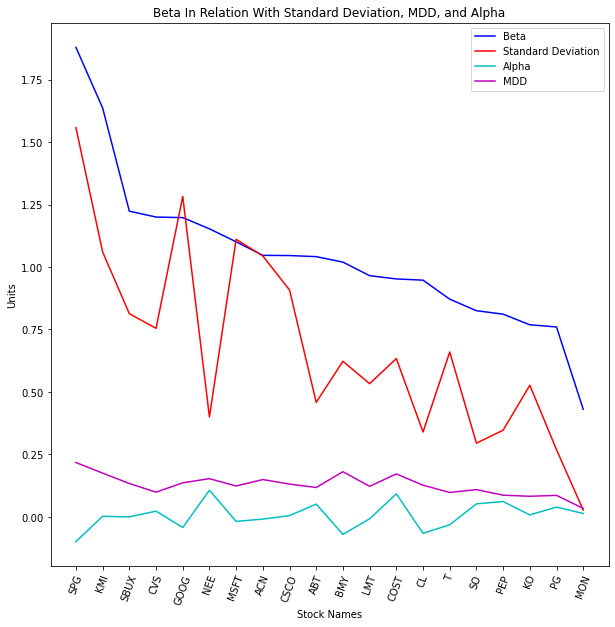

In [47]:
final_beta_std_dataframe = pd.DataFrame(final_beta_std)
final_beta_std_dataframe.columns = ['Beta', 'Standard Deviation', 'Stock Names']

final_beta_std_dataframe['Alpha'] = pd.DataFrame(get_alpha(final_beta_std_dataframe['Stock Names'].tolist()))

########### NOT sure if MDD is right here
final_beta_std_dataframe['MDD'] = pd.DataFrame(get_mdd(final_beta_std_dataframe['Stock Names'].tolist()))
final_beta_std_dataframe
# Dynamic Function to Draw Graph

plt.figure(figsize=(10, 10))

# Define the function that draws the Graph
def draw_graphs(df):
    # Set the list of colours
    colours = ['b', 'r', 'c', 'm']
    colour_counter = 0
    for column_name in (df.columns.tolist()):
        if(column_name != 'Stock Names'):
            plt.plot(df['Stock Names'], df[column_name], color = colours[colour_counter], label = (column_name))
            colour_counter += 1

    plt.legend(loc ='best')
    plt.xlabel('Stock Names')
    plt.xticks(rotation = 70)
    plt.ylabel('Units')
    plt.title('Beta In Relation With Standard Deviation, MDD, and Alpha')

    # Display the graph
    plt.show()

draw_graphs(final_beta_std_dataframe)

In [44]:
get_mdd_average(final_beta_std_dataframe['Stock Names'].tolist())

0.12700982812391673

In [45]:
list_testing = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]
for x in range

SyntaxError: invalid syntax (<ipython-input-45-9e86fe1648a4>, line 2)

In [ ]:
def create_portfolio(stock_list,weight):
    ticker_frame = pd.DataFrame()
    for x in range (len(stock_list)):
        ticker_frame = pd.concat([ticker_frame, pd.DataFrame((hist_data['Close of '+stock_list[x]]*(1/len(stock_list)*((weight+5)/100)*100000)/hist_data['Close of '+stock_list[x]].iloc[0])).rename(columns={'Close of '+stock_list[x]:'Value of '+stock_list[x]})], axis=1)
    return ticker_frame

In [ ]:
list_tuple

In [ ]:
check_fifty(0,list_tuple)

In [ ]:
val_list = []
for x in range(len(list_tuple)):
    val_list.append(check_fifty(x,list_tuple))

In [ ]:
val_list

In [ ]:
def check_fifty(fifty_index,pair_list):
    total_value_frame = pd.DataFrame()
    temp_frame = pd.DataFrame()
    temp_beta = pd.DataFrame()
    temp_beta[MarketIndex] = marketing_hist['Close'].pct_change()*100
    for x in range (len(pair_list)):
        if fifty_index == x:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[x],50)],axis=1)
        else:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[x],0)],axis=1)
    temp_beta[MarketIndex] = marketing_hist['Close'].pct_change()*100
    temp_frame['Balance'] = temp_frame.sum(axis=1)
    temp_frame['Monthly Returns'] = temp_frame['Balance'].pct_change()* 100
    temp_beta = pd.concat([temp_beta, temp_frame['Monthly Returns']],join='inner',axis=1)
    MarketVar= temp_beta['^GSPC'].var()
    compare_market = pd.DataFrame(temp_beta.cov() / MarketVar)
    beta_port = compare_market.iloc[0,1]
    alpha_port = (temp_frame['Monthly Returns'] - ((temp_frame['Monthly Returns'].mean())* beta_port)).mean()
    std_port =temp_frame['Monthly Returns'].std(axis=0,skipna=True)
    risk_value = alpha_port+std_port+beta_port
    return risk_value

In [ ]:
def check_double(large_index,small_index,big,small,pair_list):
    total_value_frame=pd.DataFrame()
    temp_frame = pd.DataFrame()
    temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[large_index],big)])
    for y in range (len(pair_list)):
        if small_index == y:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[y],small)])
        elif large_index != y:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[y],0)])
    return total_value_frame     

In [ ]:
def check_triple(first,second,third,single,double,pair_list):
    total_value_frame=pd.DataFrame()
    temp_frame = pd.DataFrame()
    temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[first],single])
    for y in range (len(pair_list)):
        if second == y or third == y:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[y],double)])
        elif first != y:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[y],0)])
    return total_value_frame

In [ ]:
def check_quadruple(first,second,third,fourth,list_tuple):
    total_value_frame=pd.DataFrame()
    temp_frame = pd.DataFrame()
    temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[first],20)])
    for y in range (len(list_tuple)):
        if second == y or third == y or fourth ==y:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[y],10)])
        elif first != y:
            temp_frame = pd.concat([temp_frame,create_portfolio(pair_list[y],0)])
    return

In [ ]:
def check_all(pair_list):
    total_value_frame = pd.DataFrame()
    total_value_frame = create_portfolio(total_list)

In [ ]:
## Check the value of the portfolio with all 10,000 dollars invested in it
base_portfolio = create_portfolio(['AAPL'],100000)
base_portfolio['Balance'] = base_portfolio.sum(axis=1)
base_portfolio['Monthly Returns']= base_portfolio['Balance'].pct_change()* 100
## Calculate the sharpe ratio and assign it to a variable
base_value = base_portfolio.mean().loc['Monthly Returns']*base_portfolio.std(axis=0,skipna=True).loc['Monthly Returns']
## Place the sharpe ratio into a list
sharpe_list = [base_value]
## Iterate through weightings 1-100, and calculate the sharpe ratio
new_list = [stock_list[0]]
list_of_weights = [stock_list[0]]
weighted_portfolio = pd.DataFrame()
for x in range (min(len(cleaned_list),20)):
    overall_portfolio = create_portfolio(list_of_weights,new_list,100000)
    new_list.append(stock_list[x])
    for x in range(1,101):
        current_portfolio = pd.concat([create_monthly(overall_portfolio, (10000*x/100)), create_monthly(stock_list[x], (10000*(100-x)/100))],axis=1)
        current_portfolio['Balance'] = current_portfolio.sum(axis=1)
        current_portfolio['Monthly Returns']= current_portfolio['Balance'].pct_change()* 100
        current_value = current_portfolio.mean().loc['Monthly Returns']/current_portfolio.std(axis=0,skipna=True).loc['Monthly Returns']
        ## Add the sharpe ratio to a list
        sharpe_list.append(current_value)
        ## If the sharpe ratio is larger than the current largest one, replace it
        if base_value < current_value:
            ## Take the ideal weighting and store it in a variable
            weighting=x
            base_value = current_value
        

    

In [ ]:
tot_data=yf.Ticker("AAPL").history(start=start_date,end=end_date)

In [ ]:
tot_info = yf.Ticker("AAPL").info

In [ ]:
tot_info['regularMarketPrice']

In [ ]:
tot_data.head()